# Taller número uno

## Stiven Sánchez Rico - 1035920250 (stiven.sanchez@educatic.com.co)

### Introducción
Hacer un analisis descriptivo y exploratorio de Los datos al interior del data set asignado (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Si se debio hacer limpieza de datos se debe explicar que metodologia se uso para transformar las variables y dejar las datos listos. Ademas de resumir el estado original de las variables (cantidad de atipicos, cantidad de datos faltantes etc).

El resultado debe ser colgado en un Repositorio publico de GitHub.


In [78]:
#Importamos las librerias a utilizar
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as s

In [79]:
#Importamos la data del dataset train.csv
data = pd.read_csv('train.csv');

## Visión general de los datos

Se procede a realizar un analisis de las columnas presentes en el data set

In [80]:
data.shape

(1460, 81)

Como se puede observar en el resultado anterior se tienen 1460 filas por 81 columnas, las columnas se muestran a continuación.

In [81]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

En donde 79 de las columnas son explicativas, una columna es el identificador unico y la columna **SalePrice** es la que se tratara de predecir.

In [82]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
#Se buscan los elementos null por cada una de las columnas
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [84]:
data.isnull().sum().sum()

6965

Se encuentran **6965** datos nulos en todo el dataset

In [85]:
#Se analizan las columna vacias
data.columns[data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

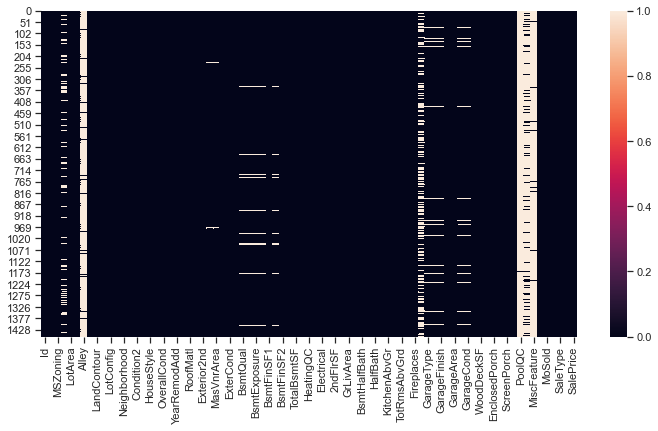

In [86]:
#Se crea una grafica para visualizar la distribucion de los datos null dentro del dataset
plt.figure(figsize=(12, 6))
s.heatmap(data.isnull())
plt.show()

In [87]:
#Valores nulos en cada una de estás columnas
Isnull = data.isnull().sum()/len(data)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

## Visualización de los datos nulos en una gráfica de barras

In [88]:
#Se convierte en un dataframe
Isnull = Isnull.to_frame()
Isnull.columns = ['Cantidad']
Isnull.index.names = ['Columna']
Isnull['Columna'] = Isnull.index

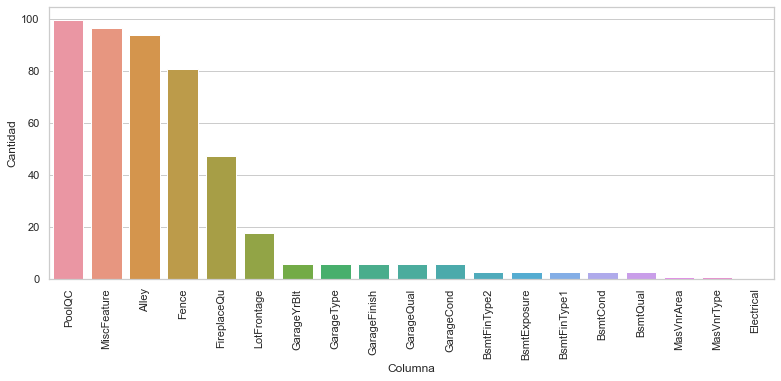

In [66]:
#Se realiza la grafica de los valores nulos
plt.figure(figsize=(13, 5))
s.set(style='whitegrid')
s.barplot(x='Columna', y='Cantidad', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

Se puede observar que las columnas que más datos null tienen son PoolQC, MiscFeature, Alley y Fence.

## Correlación entre las variables

In [67]:
#Se se separan las variables en un nuevo dataframe eligiendo del original solo las variables numericas.
data_corr = data.select_dtypes(include=[np.number])

In [68]:
data_corr.shape

(1460, 38)

Se puede observar que solo existen 38 columnas que son de tipo númerico

In [69]:
data_corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [70]:
#Teniendo en cuenta que la columna ID no es de interes en el analisis de la correlación se elimina del dtataFrame
del data_corr['Id']
data_corr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [71]:
#Correlacion entre las variables
corr = data_corr.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


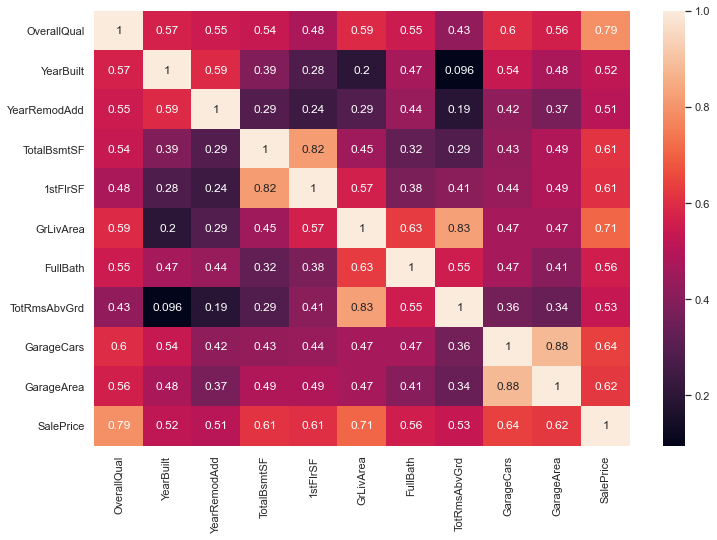

In [72]:
#Se filtra las correlaciones que sean mayores a 50% con respecto a nuestra variable objetivo SalePrice
#Se crea una grafica para una mejor visualizacion de los datos
best_corr = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
best_corr = data[best_corr].corr()
s.heatmap(best_corr, annot=True)
plt.show()

Como se puede observar la variable que mejor correlacion tiene con **SalePrice** es **OverallQuall** con un 79% seguida de cerca por **GrLivArea** con un 71%.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

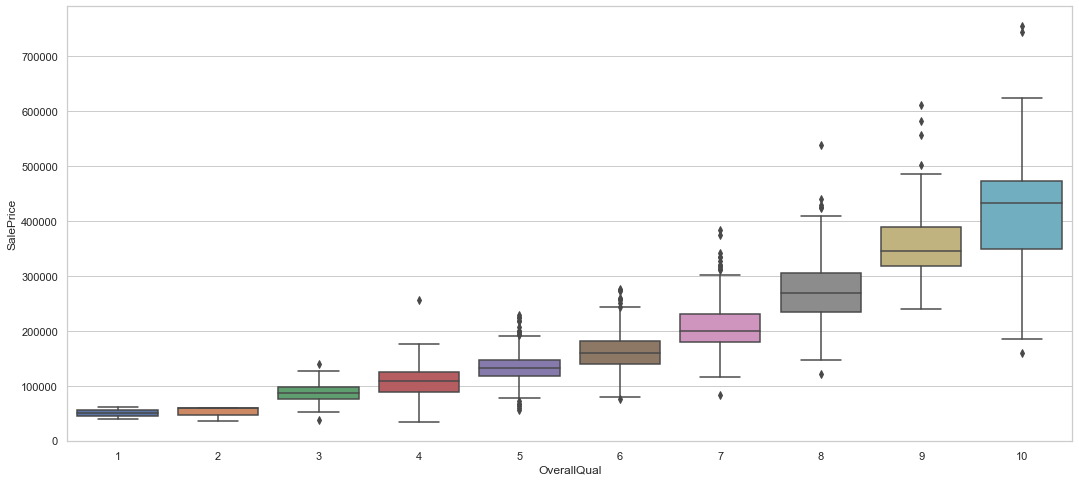

In [73]:
#Se realiza un grafico de la variables de OverallQual con respecto a SalePrice
plt.figure(figsize=(18, 8)) 
s.boxplot(x=data.OverallQual, y=data.SalePrice)

In [89]:
#Se realiza una limpieza de los datos nulos con el promedio de cada una de las columnas
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,SalePrice,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,7,1710,2,548,856,2,8,2003,208500,61.434826,-269.012772,88.935325,-31.682709,0.745479,-0.608293,0.069399,-0.185435
1,6,1262,2,460,1262,2,6,1976,181500,-93.208251,311.774283,-19.810539,-0.646351,0.254820,-0.176267,-0.623185,0.115119
2,7,1786,2,608,920,2,6,2001,223500,170.819560,-256.312664,125.148202,-25.558509,-1.115669,0.541258,-0.047643,-0.283779
3,7,1717,3,642,756,1,7,1915,140000,30.272975,-348.027653,193.818186,60.035195,-1.041030,-1.385338,0.108383,0.911022
4,8,2198,3,836,1145,2,9,2000,250000,675.623401,-294.187269,251.063275,-9.911157,0.467021,-0.663719,0.237899,0.052631


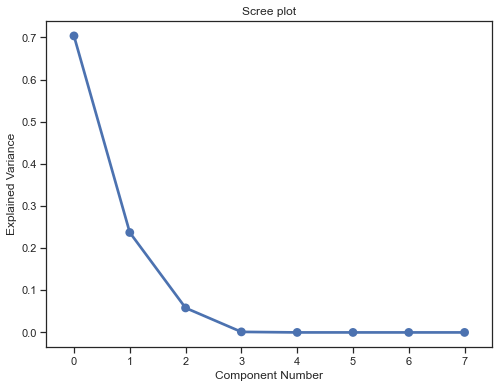

C:\Users\LENOVO1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO1\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


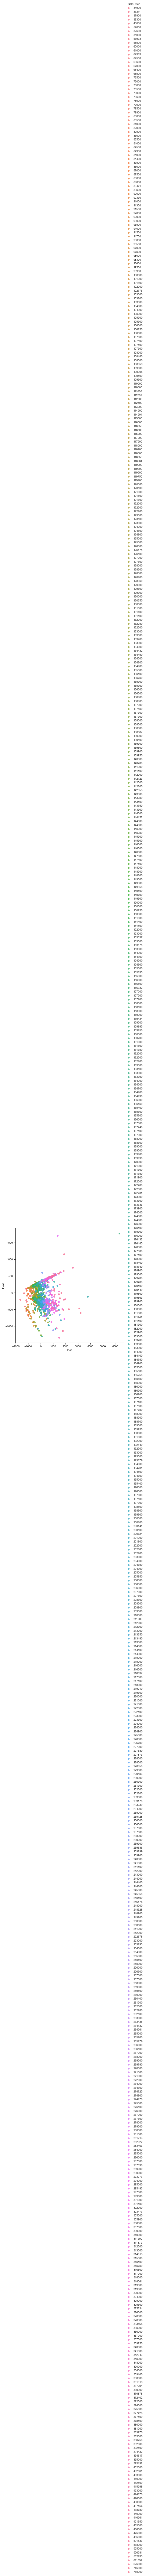

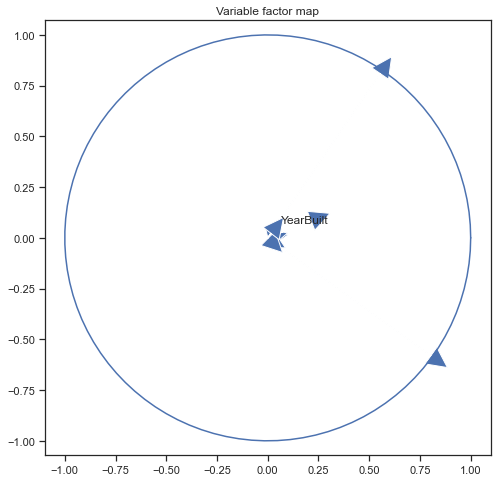

In [91]:
df = data.loc[:,['OverallQual', 'GrLivArea', 'GarageCars','GarageArea' ,'TotalBsmtSF' ,'FullBath', 'TotRmsAbvGrd', 'YearBuilt','SalePrice']]

df = df.fillna(df.mean())

n_components = 8

# Do the PCA.
pca = PCA(n_components=n_components)

reduced = pca.fit_transform(df.loc[:,['OverallQual', 'GrLivArea', 'GarageCars','GarageArea' ,'TotalBsmtSF' ,'FullBath', 'TotRmsAbvGrd', 'YearBuilt']])

# Append the principle components for each entry to the dataframe

for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

display(df.head())



# Do a scree plot

ind = np.arange(0, n_components)

(fig, ax) = plt.subplots(figsize=(8, 6))

s.pointplot(x=ind, y=pca.explained_variance_ratio_)

ax.set_title('Scree plot')

ax.set_xticks(ind)

ax.set_xticklabels(ind)

ax.set_xlabel('Component Number')

ax.set_ylabel('Explained Variance')

plt.show()



# Show the points in terms of the first two PCs

g = s.lmplot('PC1',

        'PC2',

        hue='SalePrice',data=df,

        fit_reg=False,

        scatter=True,

        size=7)



plt.show()



# Plot a variable factor map for the first two dimensions.

(fig, ax) = plt.subplots(figsize=(8, 8))

for i in range(0, pca.components_.shape[1]):

      ax.arrow(0,

       0, # Start the arrow at the origin

       pca.components_[0, i], #0 for PC1

       pca.components_[1, i], #1 for PC2

       head_width=0.1,

       head_length=0.1)



plt.text(pca.components_[0, i] + 0.05,

       pca.components_[1, i] + 0.05,

       df.columns.values[i])





an = np.linspace(0, 2 * np.pi, 100)

plt.plot(np.cos(an), np.sin(an)) # Add a unit circle for scale

plt.axis('equal')

ax.set_title('Variable factor map')

plt.show()



### Bibliografia
Las graficas y parte del analisis se realizan con la ayuda de los siguientes sitios web:
https://www.youtube.com/watch?v=vtm35gVP8JU
https://www.youtube.com/watch?v=LvfbopVq-WE 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt
https://pyciencia.blogspot.com/2015/04/trabajar-con-datos-nan-en-dataframe.html